In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,make_scorer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping
from keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from keras.regularizers import l2

In [4]:
import statsmodels.api as sm

In [5]:
#Load train data
cars_processed_train_path ='data/processed_train.csv'
cars_train_df = pd.read_csv(cars_processed_train_path,index_col=None)
cars_train_df

,id,vehicle_damage,binary_clean_title,turbo,fuel_type_2_Diesel,fuel_type_2_Electric,fuel_type_2_Gasoline,fuel_type_2_Hybrid,fuel_type_2_Other,engine_config_Flat,...,speed_9.0,speed_10.0,ext_col_price_bin,int_col_price_bin,brand_price_bin,model_year,milage,hp,size,price
0,0,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,1,2007,213000,172.0,1.6,4200
1,1,1.0,1,0,0,0,1,0,0,0,...,0,0,1,1,2,2002,143250,252.0,3.9,4999
2,2,0.0,1,0,0,0,0,0,1,0,...,0,0,1,1,4,2002,136731,320.0,5.3,13900
3,3,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2017,19500,420.0,5.0,45000
4,4,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2021,7388,208.0,2.0,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2017,49000,420.0,6.2,27500
188529,188529,1.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2018,28600,385.0,3.0,30000
188530,188530,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2021,13650,469.0,4.0,86900
188531,188531,0.0,0,0,0,0,0,0,1,0,...,0,0,5,1,3,2022,13895,300.0,3.0,84900


In [6]:
explanatory_variables = list(cars_train_df.columns)
explanatory_variables.remove('id')
explanatory_variables.remove('price')
print("number of explanatory variables: ", len(explanatory_variables))
explanatory_variables

number of explanatory variables:  39


['vehicle_damage',
 'binary_clean_title',
 'turbo',
 'fuel_type_2_Diesel',
 'fuel_type_2_Electric',
 'fuel_type_2_Gasoline',
 'fuel_type_2_Hybrid',
 'fuel_type_2_Other',
 'engine_config_Flat',
 'engine_config_Inline',
 'engine_config_Other',
 'engine_config_V-Type',
 'transmission_type_Automatic',
 'transmission_type_DCT',
 'transmission_type_Manual',
 'transmission_type_Other',
 'cylinder_3.0',
 'cylinder_4.0',
 'cylinder_5.0',
 'cylinder_6.0',
 'cylinder_8.0',
 'cylinder_10.0',
 'cylinder_12.0',
 'speed_1.0',
 'speed_2.0',
 'speed_4.0',
 'speed_5.0',
 'speed_6.0',
 'speed_7.0',
 'speed_8.0',
 'speed_9.0',
 'speed_10.0',
 'ext_col_price_bin',
 'int_col_price_bin',
 'brand_price_bin',
 'model_year',
 'milage',
 'hp',
 'size']

In [7]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(cars_train_df[explanatory_variables], cars_train_df['price'], test_size=0.2, random_state=42)

# Split the training set further into validation and training sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [8]:
print("Size for training: ",len(x_train))
print("Size for validation: ", len(x_validation))
print("Size for testing: ", len(y_test))

Size for training:  120660
Size for validation:  30166
Size for testing:  37707


### OLS Model

In [9]:
# OLS Model
# Ordinary Least Squares (OLS) regression model.

x_train_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_const)
ols_model = model.fit()

# Check the summary of the regression model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     413.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:37:01   Log-Likelihood:            -1.5302e+06
No. Observations:              120660   AIC:                         3.061e+06
Df Residuals:                  120625   BIC:                         3.061e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#####All coeficients are statistically significant to the 5%, altough the r squared indicates us that this OLS model is not really good.

In [11]:
# Testing the model
x_test_const = sm.add_constant(x_test)

# Predict on the test set
y_test_pred = ols_model.predict(x_test_const)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Test RMSE: {rmse_test}')

Test RMSE: 69883.78566228921


### Neural Network 1

In [22]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    min_delta=0.0001,  # minimum amount of change to count as an improvement
    patience=15,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialize the model
nn_model = Sequential()

# Add layers
nn_model.add(Input(shape=(39,)))  # Input layer
nn_model.add(BatchNormalization())
nn_model.add(Dense(156, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(78, activation='relu'))
nn_model.add(Dense(1))  # Output layer for regression (no activation function)

# Compile the model with mean squared error loss and MAE as a metric
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Fit the model
history = nn_model.fit(
    x_train, y_train,
    validation_data=(x_validation, y_validation),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping]
)

Epoch 1/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8923579392.0000 - root_mean_squared_error: 94368.7344 - val_loss: 4543363072.0000 - val_root_mean_squared_error: 67404.4766
Epoch 2/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7496154624.0000 - root_mean_squared_error: 86202.5781 - val_loss: 4418274816.0000 - val_root_mean_squared_error: 66470.1016
Epoch 3/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6000532992.0000 - root_mean_squared_error: 77178.9453 - val_loss: 4228737280.0000 - val_root_mean_squared_error: 65028.7422
Epoch 4/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5838018048.0000 - root_mean_squared_error: 76140.5938 - val_loss: 4195651584.0000 - val_root_mean_squared_error: 64773.8477
Epoch 5/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5935834624.0000 - root_mean_squared_error: 76878.6484 - val_loss: 4172833280.0000 - val_root_mean_squared_error: 64597.4727
Epoch 6/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6816974336.000

In [23]:
nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_1                │ (None, 39)                  │             156 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 156)                 │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 156)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 78)                  │          12,246 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              79 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,009 (218.79 KB)

 Trainable params: 18,643 (72.82 KB)

 Non-trainable params: 78 (312.00 B)

 Optimizer params: 37,288 (145.66 KB)

### Neural Network 2

In [65]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    min_delta=0.0001,  # minimum amount of change to count as an improvement
    patience=15,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialize the model
nn_model = Sequential()

# Add layers
nn_model.add(Input(shape=(39,)))  # Input layer
nn_model.add(BatchNormalization())
nn_model.add(Dense(156, activation='relu', kernel_regularizer=l2(0.001)))  # Reduced units and added L2 regularization
nn_model.add(Dropout(0.2))  # Increased dropout
nn_model.add(Dense(78, activation='relu', kernel_regularizer=l2(0.001)))  # Reduced units and added L2 regularization
nn_model.add(Dense(1))  # Output layer for regression


# Compile the model with mean squared error loss and MAE as a metric
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Fit the model
history = nn_model.fit(
    x_train, y_train,
    validation_data=(x_validation, y_validation),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping]
)

Epoch 1/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8483336192.0000 - root_mean_squared_error: 91911.1016 - val_loss: 4441415680.0000 - val_root_mean_squared_error: 66643.9453
Epoch 2/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5859514368.0000 - root_mean_squared_error: 76396.8125 - val_loss: 4201807360.0000 - val_root_mean_squared_error: 64821.3477
Epoch 3/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5523553280.0000 - root_mean_squared_error: 74043.3047 - val_loss: 4166916864.0000 - val_root_mean_squared_error: 64551.6602
Epoch 4/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6089033216.0000 - root_mean_squared_error: 77889.5703 - val_loss: 4152592896.0000 - val_root_mean_squared_error: 64440.6172
Epoch 5/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5761649152.0000 - root_mean_squared_error: 75510.1484 - val_loss: 4144764160.0000 - val_root_mean_squared_error: 64379.8438
Epoch 6/200
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5442784768.000

In [66]:
nn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_7                │ (None, 39)                  │             156 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 156)                 │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 156)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 78)                  │          12,246 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              79 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,009 (218.79 KB)

 Trainable params: 18,643 (72.82 KB)

 Non-trainable params: 78 (312.00 B)

 Optimizer params: 37,288 (145.66 KB)

### Neural network Evaluation

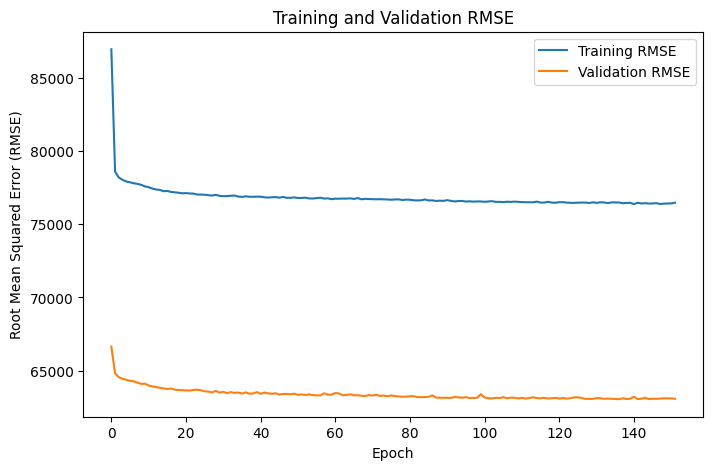

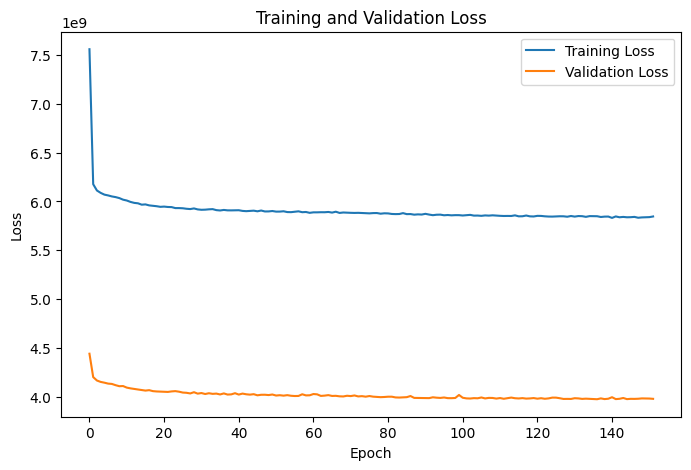

In [67]:
history_df = pd.DataFrame(history.history)
# Plotting the RMSE
plt.figure(figsize=(8, 5))
plt.plot(history_df['root_mean_squared_error'], label='Training RMSE')
plt.plot(history_df['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()

# Plotting the Loss
plt.figure(figsize=(8, 5))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [69]:
# Predict on the test set
y_test_pred = nn_model.predict(x_test)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Test RMSE: {rmse_test}')

# Best RMSE for now : 68246.43958568497

1179/1179 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step
Test RMSE: 68288.20714679663


### Decision Tree Regressor

In [20]:
# GRID SEARCH
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Different tree depths
    'min_samples_split': [2, 10, 20],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 5, 10]  # Minimum number of samples required in a leaf node
}

# Create a DecisionTreeRegressor instance
dt_model = DecisionTreeRegressor(random_state=42)

# Define a custom scoring function for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           scoring=rmse_scorer, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_rmse = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation RMSE: {best_rmse:.2f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation RMSE: 93110.84


In [21]:
# Initialize the Decision Tree regressor
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1,min_samples_split=2,random_state=42)

# Fit the model
dt_model.fit(x_train, y_train)

# Make predictions
y_pred_train = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

# Evaluate the model
train_rmse = root_mean_squared_error(y_train, y_pred_train)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Decision Tree Regressor Training RMSE: {train_rmse:.2f}")
print(f"Decision Tree Regressor Test RMSE: {test_rmse:.2f}")

Decision Tree Regressor Training RMSE: 64235.46
Decision Tree Regressor Test RMSE: 80911.52


### Support Vector Machine Regressor

In [ ]:
# Initialize the SVM regressor
svm_model = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0, epsilon=0.1))

# Fit the model
svm_model.fit(x_train, y_train)

# Make predictions
y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"SVM Training RMSE: {train_rmse:.2f}")
print(f"SVM Test RMSE: {validation_rmse:.2f}")

## Subsmission with current Model

In [26]:
#Load evaluation data
cars_processed_test_path ='data/processed_test.csv'
cars_evaluation_df = pd.read_csv(cars_processed_test_path,index_col=None)
cars_evaluation_df

,id,vehicle_damage,binary_clean_title,turbo,fuel_type_2_Diesel,fuel_type_2_Electric,fuel_type_2_Gasoline,fuel_type_2_Hybrid,fuel_type_2_Other,engine_config_Flat,...,speed_8.0,speed_9.0,speed_10.0,ext_col_price_bin,int_col_price_bin,brand_price_bin,model_year,milage,hp,size
0,188533,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,4,2015,98000,240.0,2.0
1,188534,0.0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,4,2020,9142,395.0,3.0
2,188535,0.0,0,1,0,0,0,0,1,0,...,0,0,1,1,2,3,2022,28121,300.0,3.5
3,188536,0.0,0,0,0,0,0,0,1,0,...,0,0,0,3,1,3,2016,61258,300.0,3.0
4,188537,0.0,1,0,0,0,1,0,0,0,...,0,0,0,2,1,3,2018,59000,252.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,4,2014,83315,362.0,3.0
125686,314219,0.0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,3,2019,29336,300.0,3.0
125687,314220,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,3,2012,77634,333.0,3.0
125688,314221,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,3,2012,112000,333.0,3.0


In [27]:
#Evaluating the model
x_evaluation = cars_evaluation_df[explanatory_variables]

# Predict on the evaluation set
y_evaluation_pred = nn_model.predict(x_evaluation)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 3s 760us/step


In [28]:
cars_evaluation_df['price'] = y_evaluation_pred

In [29]:
cars_evaluation_df

,id,vehicle_damage,binary_clean_title,turbo,fuel_type_2_Diesel,fuel_type_2_Electric,fuel_type_2_Gasoline,fuel_type_2_Hybrid,fuel_type_2_Other,engine_config_Flat,...,speed_9.0,speed_10.0,ext_col_price_bin,int_col_price_bin,brand_price_bin,model_year,milage,hp,size,price
0,188533,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2015,98000,240.0,2.0,16532.263672
1,188534,0.0,1,0,0,0,0,1,0,0,...,0,0,1,1,4,2020,9142,395.0,3.0,77666.710938
2,188535,0.0,0,1,0,0,0,0,1,0,...,0,1,1,2,3,2022,28121,300.0,3.5,61284.464844
3,188536,0.0,0,0,0,0,0,0,1,0,...,0,0,3,1,3,2016,61258,300.0,3.0,32387.099609
4,188537,0.0,1,0,0,0,1,0,0,0,...,0,0,2,1,3,2018,59000,252.0,2.0,28323.287109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,4,2014,83315,362.0,3.0,24227.015625
125686,314219,0.0,0,1,0,0,0,0,1,0,...,0,0,1,1,3,2019,29336,300.0,3.0,39134.777344
125687,314220,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,3,2012,77634,333.0,3.0,17926.437500
125688,314221,0.0,1,0,0,0,1,0,0,0,...,0,0,1,1,3,2012,112000,333.0,3.0,15383.977539


In [30]:
# Convert Series to DataFrame
submission_columns = ['id','price']
submission_df =  cars_evaluation_df[submission_columns]
# Display the DataFrame
print(submission_df)

            id         price
0       188533  16532.263672
1       188534  77666.710938
2       188535  61284.464844
3       188536  32387.099609
4       188537  28323.287109
...        ...           ...
125685  314218  24227.015625
125686  314219  39134.777344
125687  314220  17926.437500
125688  314221  15383.977539
125689  314222  35988.542969

[125690 rows x 2 columns]


In [31]:
save_path = 'data/nn_submission3.csv'
submission_df.to_csv(save_path,index=False)

In [39]:
#Using scaled data

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
x_train_scaled = scaler.fit_transform(x_train)
x_validation_scaled = scaler.transform(x_validation)
x_test_scaled = scaler.transform(x_test)
x_evaluation_scaled = scaler.transform(x_evaluation)

In [35]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    min_delta=0.0001,  # minimum amount of change to count as an improvement
    patience=15,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialize the model
nn_model = Sequential()

# Add layers
nn_model.add(Input(shape=(39,)))  # Input layer
nn_model.add(BatchNormalization())
nn_model.add(Dense(156, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(78, activation='relu'))
nn_model.add(Dense(1))  # Output layer for regression (no activation function)

# Compile the model with mean squared error loss and MAE as a metric
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Fit the model
history = nn_model.fit(
    x_train_scaled, y_train,
    validation_data=(x_validation_scaled, y_validation),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping]
)

Epoch 1/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8772810752.0000 - root_mean_squared_error: 93623.7109 - val_loss: 5545052672.0000 - val_root_mean_squared_error: 74465.1094
Epoch 2/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6521809920.0000 - root_mean_squared_error: 80696.5391 - val_loss: 4305000448.0000 - val_root_mean_squared_error: 65612.5000
Epoch 3/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6116301824.0000 - root_mean_squared_error: 77948.3906 - val_loss: 4237340416.0000 - val_root_mean_squared_error: 65094.8555
Epoch 4/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5923950592.0000 - root_mean_squared_error: 76634.0000 - val_loss: 4197477632.0000 - val_root_mean_squared_error: 64787.9453
Epoch 5/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6688744960.0000 - root_mean_squared_error: 81681.6172 - val_loss: 4175086080.0000 - val_root_mean_squared_error: 64614.9062
Epoch 6/200
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6390075904.000

In [36]:
nn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_2                │ (None, 39)                  │             156 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 156)                 │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 156)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 78)                  │          12,246 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              79 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,009 (218.79 KB)

 Trainable params: 18,643 (72.82 KB)

 Non-trainable params: 78 (312.00 B)

 Optimizer params: 37,288 (145.66 KB)

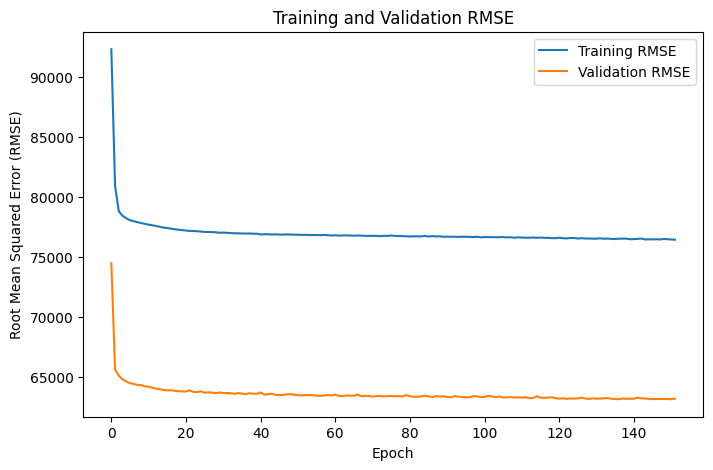

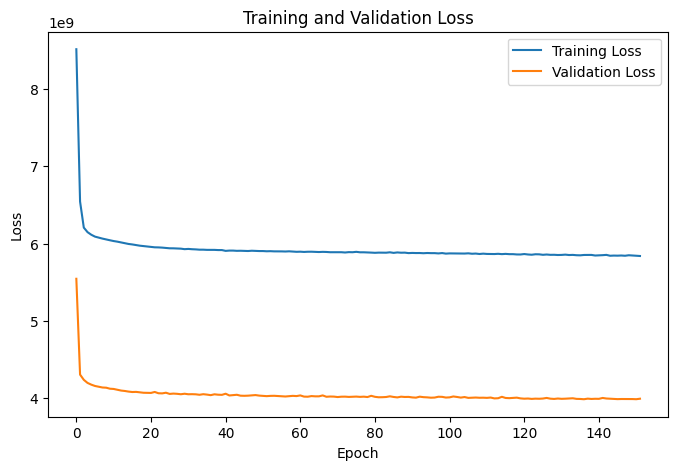

In [37]:
history_df = pd.DataFrame(history.history)
# Plotting the RMSE
plt.figure(figsize=(8, 5))
plt.plot(history_df['root_mean_squared_error'], label='Training RMSE')
plt.plot(history_df['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()

# Plotting the Loss
plt.figure(figsize=(8, 5))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [40]:
# Predict on the test set
y_test_pred = nn_model.predict(x_test_scaled)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Test RMSE: {rmse_test}')

# Best RMSE for now : 68246.43958568497

1179/1179 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step
Test RMSE: 68257.12306814594


In [43]:
#Load evaluation data
cars_processed_test_path ='data/processed_test.csv'
cars_evaluation_df = pd.read_csv(cars_processed_test_path,index_col=None)
cars_evaluation_df

,id,vehicle_damage,binary_clean_title,turbo,fuel_type_2_Diesel,fuel_type_2_Electric,fuel_type_2_Gasoline,fuel_type_2_Hybrid,fuel_type_2_Other,engine_config_Flat,...,speed_8.0,speed_9.0,speed_10.0,ext_col_price_bin,int_col_price_bin,brand_price_bin,model_year,milage,hp,size
0,188533,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,4,2015,98000,240.0,2.0
1,188534,0.0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,4,2020,9142,395.0,3.0
2,188535,0.0,0,1,0,0,0,0,1,0,...,0,0,1,1,2,3,2022,28121,300.0,3.5
3,188536,0.0,0,0,0,0,0,0,1,0,...,0,0,0,3,1,3,2016,61258,300.0,3.0
4,188537,0.0,1,0,0,0,1,0,0,0,...,0,0,0,2,1,3,2018,59000,252.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,4,2014,83315,362.0,3.0
125686,314219,0.0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,3,2019,29336,300.0,3.0
125687,314220,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,3,2012,77634,333.0,3.0
125688,314221,0.0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,3,2012,112000,333.0,3.0


In [44]:
# Predict on the evaluation set
y_evaluation_pred = nn_model.predict(x_evaluation_scaled)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 3s 747us/step


In [45]:
cars_evaluation_df['price'] = y_evaluation_pred

In [46]:
# Convert Series to DataFrame
submission_columns = ['id','price']
submission_df =  cars_evaluation_df[submission_columns]
# Display the DataFrame
print(submission_df)

            id         price
0       188533  16148.129883
1       188534  78896.492188
2       188535  55613.019531
3       188536  28610.509766
4       188537  28535.201172
...        ...           ...
125685  314218  24903.279297
125686  314219  43362.378906
125687  314220  18645.589844
125688  314221  16170.829102
125689  314222  35746.441406

[125690 rows x 2 columns]


In [47]:
save_path = 'data/nn_submission4.csv'
submission_df.to_csv(save_path,index=False)